In [1]:
from math import cos
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x):
  return 1/2 * cos(x - 2)

In [3]:
N = 20
i = 10
x0 = 2
xn = 9
hh = (xn - x0)/N

In [4]:
x = [x0 + i * hh for i in range(N + 1)]
y = [f(val) for val in x]

for i in range(N + 1):
  print(f"{i}\t{x[i]:.6e}\t{y[i]:.6e}")
nodes = [(x_val, y_val) for x_val, y_val in zip(x, y)]

0	2.000000e+00	5.000000e-01
1	2.350000e+00	4.696864e-01
2	2.700000e+00	3.824211e-01
3	3.050000e+00	2.487855e-01
4	3.400000e+00	8.498357e-02
5	3.750000e+00	-8.912303e-02
6	4.100000e+00	-2.524231e-01
7	4.450000e+00	-3.851156e-01
8	4.800000e+00	-4.711112e-01
9	5.150000e+00	-4.999823e-01
10	5.500000e+00	-4.682283e-01
11	5.850000e+00	-3.796995e-01
12	6.200000e+00	-2.451304e-01
13	6.550000e+00	-8.083811e-02
14	6.900000e+00	9.325618e-02
15	7.250000e+00	2.560427e-01
16	7.600000e+00	3.877829e-01
17	7.950000e+00	4.725027e-01
18	8.300000e+00	4.999293e-01
19	8.650000e+00	4.667372e-01
20	9.000000e+00	3.769511e-01


In [5]:
def cubic_spline_coefficients(x, y):
    n = len(x)
    h = [x[i+1] - x[i] for i in range(n-1)]
    alpha = [(3/h[i]) * (y[i+1] - y[i]) - (3/h[i-1]) * (y[i] - y[i-1]) for i in range(1, n-1)]

    l = [1] + [2*(x[i+1] - x[i-1]) for i in range(1, n-1)] + [1]
    mu = [0] * n
    z = [0] * n
    b = [0] * n
    c = [0] * n
    d = [0] * n

    l[0] = 1
    mu[0] = 0
    z[0] = 0

    for i in range(1, n-1):
        l[i] = 2*(x[i+1] - x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1]) / l[i]

    l[n-1] = 1
    z[n-1] = 0
    c[n-1] = 0

    for j in range(n-2, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (y[j+1] - y[j]) / h[j] - h[j] * (c[j+1] + 2*c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3*h[j])

    coefficients = [(y[i], b[i], c[i], d[i]) for i in range(n-1)]
    return coefficients

In [6]:
def evaluate_spline(coefficients, x):
    spline_values = []
    spline_added = False
    for xi in x:
        spline_added = False
        for i in range(len(coefficients)):
            if x[i] <= xi <= x[i + 1]:
                a, b, c, d = coefficients[i]
                yi = a + b * (xi - x[i]) + c * (xi - x[i]) ** 2 + d * (xi - x[i]) ** 3
                if not spline_added:
                    spline_values.append(yi)
                    spline_added = True
                break
    return spline_values


In [7]:
x = [x0 + i * hh for i in range(N + 1)]
y = [f(val) for val in x]


In [8]:
coefficients = cubic_spline_coefficients(x, y)
spline_values = evaluate_spline(coefficients, x)


In [9]:
for i, (yi, bi, ci, di) in enumerate(coefficients):
    print(f"Segment {i+1}: y = {yi} + {bi}(x - {x[i]}) + {ci}(x - {x[i]})^2 + {di}(x - {x[i]})^3")


Segment 1: y = 0.5 + -0.051035933723378994(x - 2.0) + 0.0(x - 2.0)^2 + -0.29040388975225406(x - 2.0)^3
Segment 2: y = 0.46968635642368944 + -0.15775936320733241(x - 2.35) + -0.30492408423986683(x - 2.35)^2 + 0.12370179966191842(x - 2.35)^3
Segment 3: y = 0.38242109364224414 + -0.32574581079948417(x - 2.7) + -0.17503719459485245(x - 2.7)^2 + 0.04239114685266836(x - 2.7)^3
Segment 4: y = 0.24878552394586356 + -0.4326931005475252(x - 3.05) + -0.13052649039955072(x - 3.05)^2 + 0.08466770308654904(x - 3.05)^3
Segment 5: y = 0.08498357145012052 + -0.49294626294290395(x - 3.4) + -0.041625402158674205(x - 3.4)^2 + 0.08218552815364356(x - 3.4)^3
Segment 6: y = -0.08912302782474604 + -0.49188086285751187(x - 3.75) + 0.04466940240265156(x - 3.75)^2 + 0.07898019196785197(x - 3.75)^3
Segment 7: y = -0.25242305229992856 + -0.4315870606274702(x - 4.1) + 0.12759860396889605(x - 4.1)^2 + 0.06372169118833448(x - 4.1)^3
Segment 8: y = -0.38511562702365343 + -0.3188503163375302(x - 4.449999999999999) + 0.

In [10]:
def tridiagonal_solver(a, b, c, d):
    n = len(d)
    c_ = [0] * n
    d_ = [0] * n
    x = [0] * n

    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]

    for i in range(1, n):
        m = 1.0 / (b[i] - a[i-1] * c_[i-1])
        c_[i] = c[i] * m
        d_[i] = (d[i] - a[i-1] * d_[i-1]) * m

    x[-1] = d_[-1]

    for i in range(n - 2, -1, -1):
        x[i] = d_[i] - c_[i] * x[i+1]

    return x


In [11]:
coefficients = cubic_spline_coefficients(x, y)


In [12]:
a = [0] + [1] * (N - 1)
b = [4] * N
c = [1] * (N - 1) + [0]
d = [6 * ((y[i+1] - y[i]) / hh - (y[i] - y[i-1]) / hh) for i in range(1, N)]

In [13]:
solution = tridiagonal_solver(a, b, c, d)

print(solution)

[-0.19914863059605462, -0.17971894970380606, -0.07604374829795178, -0.033244047950600375, 0.03236885245823572, 0.08902420611224081, 0.13623346168921804, 0.16656248564030307, 0.1767917570524323, 0.16555867743479258, 0.1342563072604764, 0.08667846189632848, 0.028570135355973345, -0.032924882269527486, -0.09071756019496811, -0.13642807595794554, -0.16963508263980362, -0.16719922583818003, -0.20074601389396635]


In [14]:
coefficients = cubic_spline_coefficients(x, y)

for i, (yi, bi, ci, di) in enumerate(coefficients):
    print(f"Segment {i+1}: c = {ci}")


for i, (a, b, c, d) in enumerate(coefficients):
    print(f"Segment {i+1}: a = {a}, b = {b}, c = {c}, d = {d}")

Segment 1: c = 0.0
Segment 2: c = -0.30492408423986683
Segment 3: c = -0.17503719459485245
Segment 4: c = -0.13052649039955072
Segment 5: c = -0.041625402158674205
Segment 6: c = 0.04466940240265156
Segment 7: c = 0.12759860396889605
Segment 8: c = 0.1945063797166472
Segment 9: c = 0.23797664646368683
Segment 10: c = 0.2525515505755479
Segment 11: c = 0.2365145673552988
Segment 12: c = 0.1917941429348011
Segment 13: c = 0.12382653000982263
Segment 14: c = 0.0408144373141329
Segment 15: c = -0.047035534908209546
Segment 16: c = -0.1295965175628826
Segment 17: c = -0.19489725056503027
Segment 18: c = -0.24233583255779007
Segment 19: c = -0.23885603685429738
Segment 20: c = -0.28678001986286766
Segment 1: a = 0.5, b = -0.051035933723378994, c = 0.0, d = -0.29040388975225406
Segment 2: a = 0.46968635642368944, b = -0.15775936320733241, c = -0.30492408423986683, d = 0.12370179966191842
Segment 3: a = 0.38242109364224414, b = -0.32574581079948417, c = -0.17503719459485245, d = 0.042391146852

In [15]:
x_values = []
spline_values = []
for i, (a, b, c, d) in enumerate(coefficients):
    for j in range(N):
        xi = x[i] + j * hh
        yi = a + b * (xi - x[i]) + c * (xi - x[i]) ** 2 + d * (xi - x[i]) ** 3
        x_values.append(xi)
        spline_values.append(yi)

errors = [actual - approx for actual, approx in zip(y, spline_values)]



In [16]:
for i in range(len(y)):
    print(f"x = {x[i]:.6f}, Actual y = {y[i]:.6f}, Approximated y = {spline_values[i]:.6f}, Error = {errors[i]:.6f}")



x = 2.000000, Actual y = 0.500000, Approximated y = 0.500000, Error = 0.000000
x = 2.350000, Actual y = 0.469686, Approximated y = 0.469686, Error = 0.000000
x = 2.700000, Actual y = 0.382421, Approximated y = 0.364666, Error = 0.017755
x = 3.050000, Actual y = 0.248786, Approximated y = 0.110233, Error = 0.138552
x = 3.400000, Actual y = 0.084984, Approximated y = -0.368319, Error = 0.453302
x = 3.750000, Actual y = -0.089123, Approximated y = -1.145696, Error = 1.056573
x = 4.100000, Actual y = -0.252423, Approximated y = -2.296606, Error = 2.044183
x = 4.450000, Actual y = -0.385116, Approximated y = -3.895754, Error = 3.510638
x = 4.800000, Actual y = -0.471111, Approximated y = -6.017847, Error = 5.546736
x = 5.150000, Actual y = -0.499982, Approximated y = -8.737591, Error = 8.237609
x = 5.500000, Actual y = -0.468228, Approximated y = -12.129693, Error = 11.661464
x = 5.850000, Actual y = -0.379700, Approximated y = -16.268858, Error = 15.889159
x = 6.200000, Actual y = -0.24513

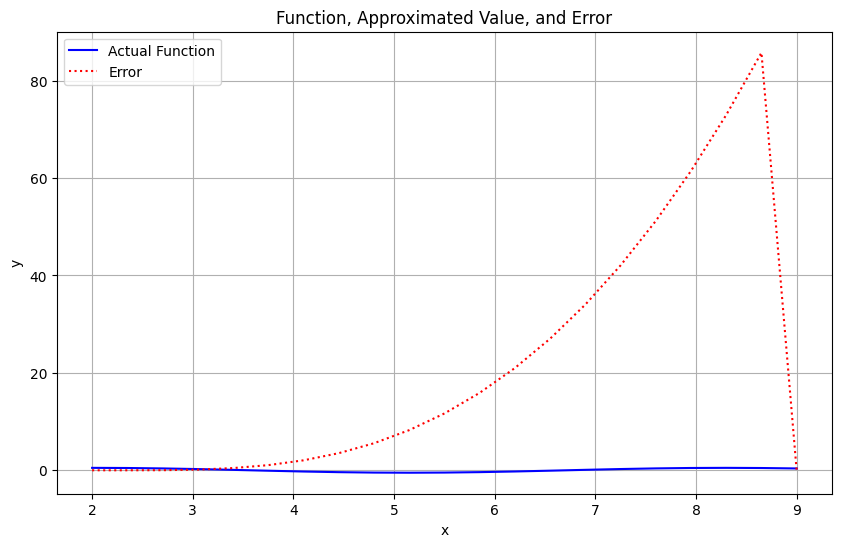

In [17]:
errors = [actual - approx for actual, approx in zip(y, spline_values)]

plt.figure(figsize=(10, 6))

plt.plot(x, y, label='Actual Function', color='blue')

plt.plot(x, errors, label='Error', linestyle=':', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function, Approximated Value, and Error')
plt.legend()
plt.grid(True)
plt.show()